<img src="logo.png",width=200,height=200>

# Actividad 13 - Dimensionalidad y Agrupación

* Para poder realizar esta actividad debes haber revisado la lectura correspondiente a la semana.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminada la actividad, comprime la carpeta y sube el `.zip` a la sección correspondiente.

### Sobre el ejemplo

* Para esta actividad utilizaremos un subconjunto de 25 items de la _International Personality Item Pool_, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características _Amabilidad_, _Escrupolisidad_, _Extroversión_, _Neuroticismo_, _Apertura_ Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

    - 1: No me representa para nada.
    - 2: No me representa.
    - 3: Algunas cosas no me representan.
    - 4: Algunas cosas me representan.
    - 5: Me representa.
    - 6: Me representa completamente.


* Las 25 preguntas son:
    * `A1`  Soy indiferente a los sentimientos de otros.
    * `A2` Me preocupo del bienestar de otros. 
    * `A3` Sé cómo confortar a otros.
    * `A4` Me agradan los niños. 
    * `A5` Hago sentir tranquila a la gente. 
    * `C1` Soy exacto en mi trabajo.
    * `C2` Sigo con mis tareas hasta que todo esté perfecto.
    * `C3` Hago cosas siguiendo un plan.
    * `C4` Hago cosas con el mínimo esfuerzo.
    * `C5` Pierdo mi tiempo. 
    * `E1` No hablo mucho con las personas.
    * `E2` Me es dificil acercarme a otros.
    * `E3` Sé cómo cautivar gente.
    * `E4` Hago amigos de forma fácil. 
    * `E5` Puedo tomar el cargo de las cosas. 
    * `N1` Me enojo con facilidad.
    * `N2` Me irrito con facilidad.
    * `N3` Tengo cambios de humor frecuentes.
    * `N4` Usualmente me siento melancólico. 
    * `N5` Entro en pánico con facilidad. 
    * `O1` Estoy lleno de ideas.
    * `O2` Evito leer material difícil.
    * `O3` Tiendo a llevar la conversación a niveles más altos.
    * `O4` Dedico tiempo a la reflexión de cosas. 
    * `O5` No profundizaré sobre una materia específica. 
    
* Se registraron una serie de covariables sobre características demográficas de los encuestados:
    * `gender` Hombre = 1, Mujer =2.
    * `education` 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
    * `age` Edad en Años.
    
* Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Ejercicio 1: Lectura de archivos

* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
* Solicite las primeras 5 observaciones con `head`.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as fact
import missingno as msngo
import warnings

warnings.filterwarnings(action='ignore')
df = pd.read_csv('bfi.csv')
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos  

In [16]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


## Ejercicio 2: Preprocesamiento

* Elimine las columnas redundantes de la base, tal como `'Unnamed: 0'`.
* Analice el patrón de datos perdidos con `missingno`. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [9]:
df = df.drop('Unnamed: 0', axis = 1)

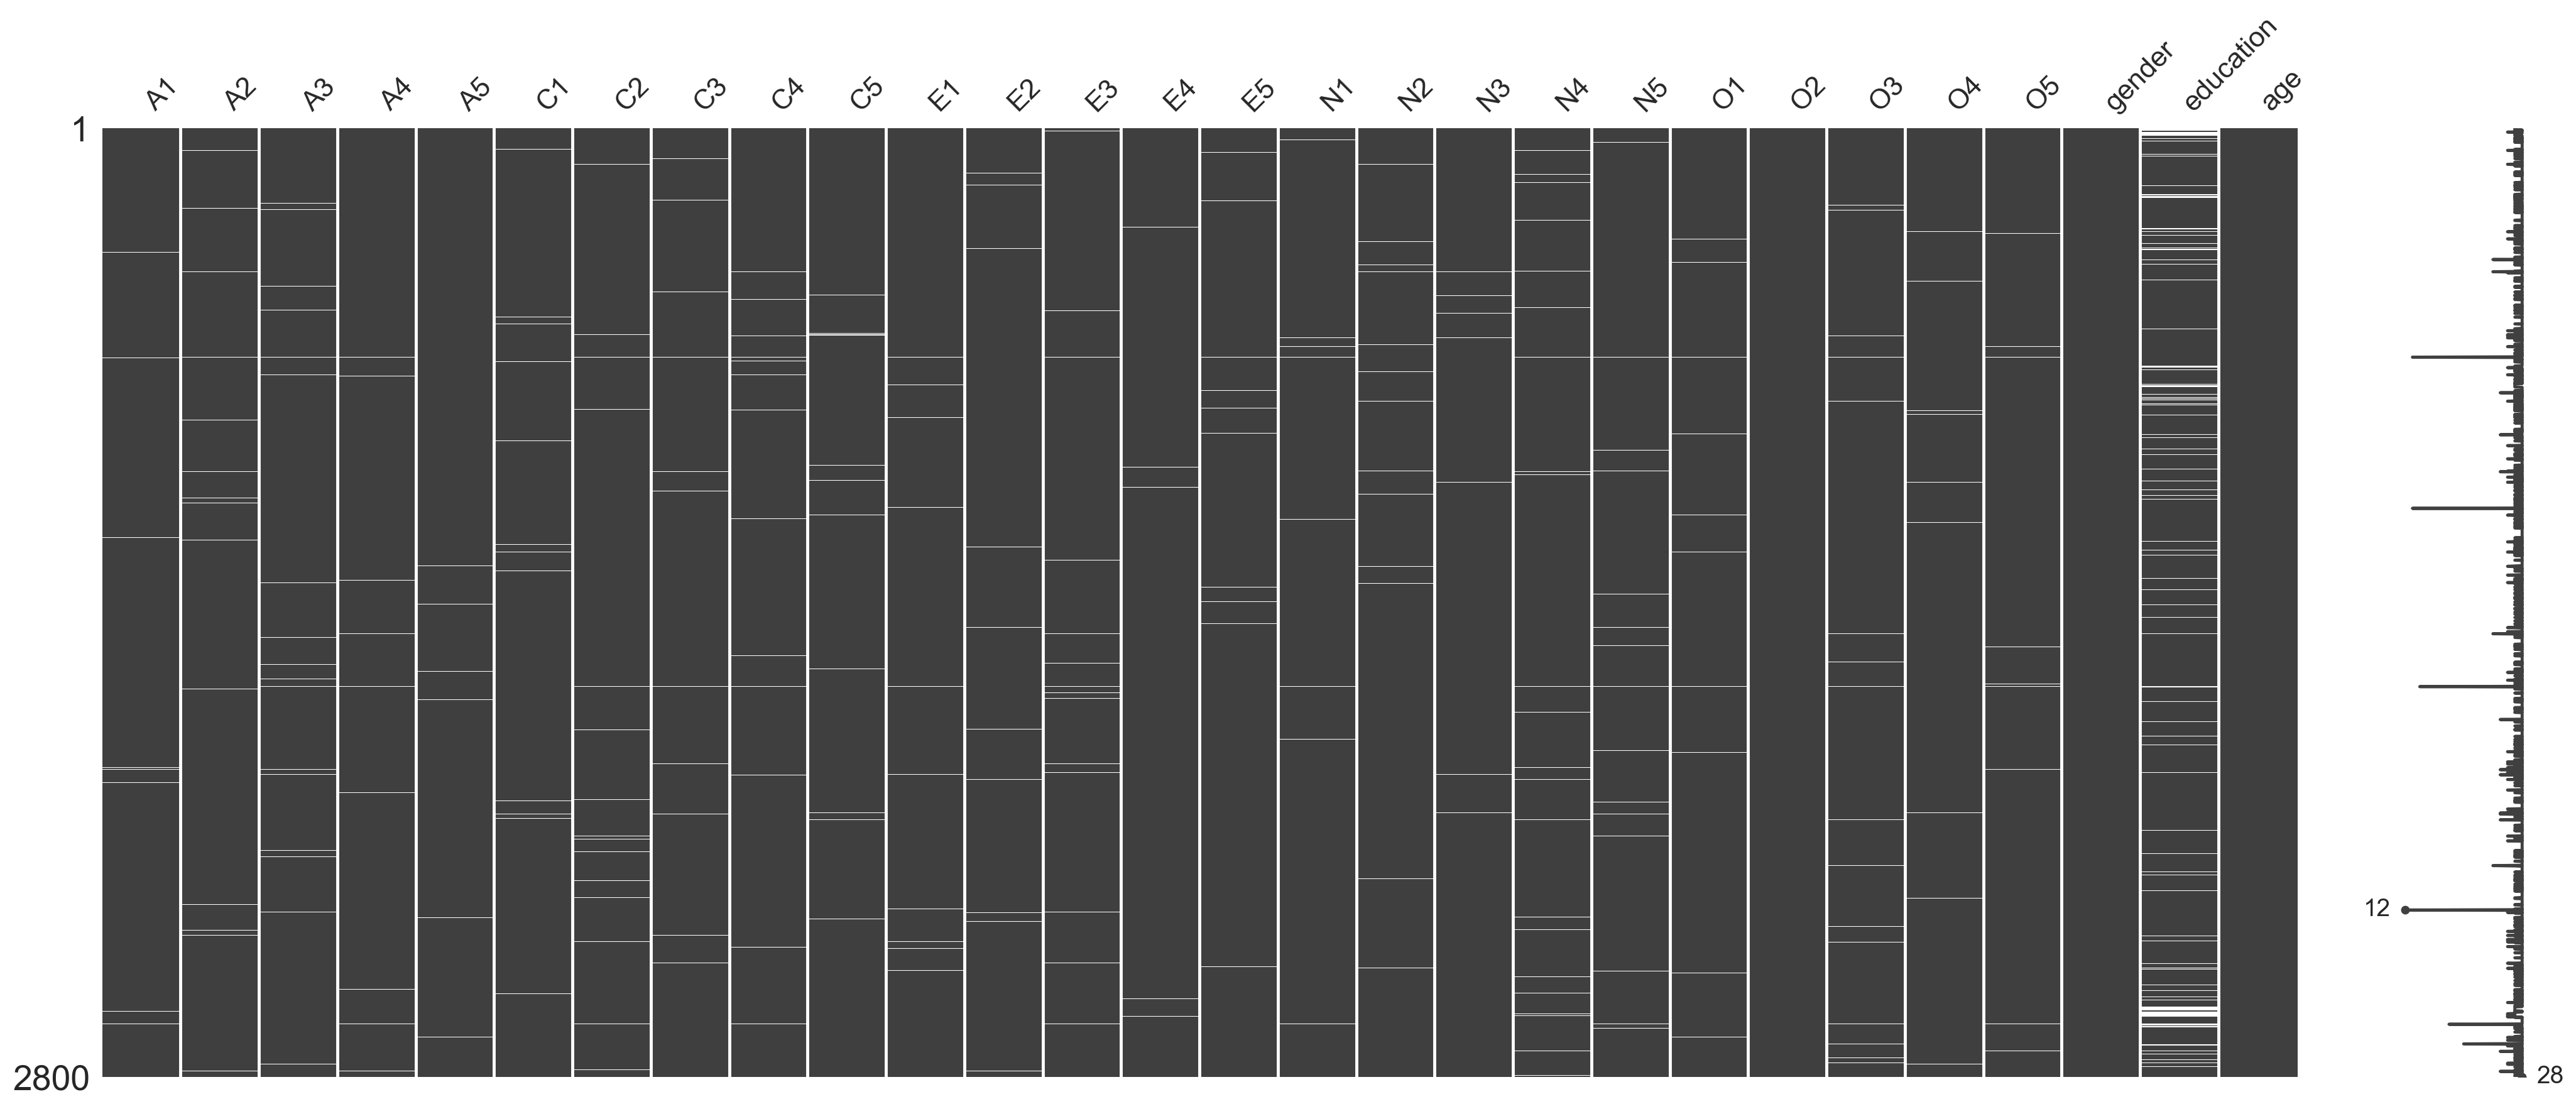

In [10]:
msngo.matrix(df);

In [14]:
for colname, serie in df.iteritems():
    print(colname, "NA's %\n")
    print(serie.isnull().value_counts('%'))

A1 NA's %

False    0.994286
True     0.005714
Name: A1, dtype: float64
A2 NA's %

False    0.990357
True     0.009643
Name: A2, dtype: float64
A3 NA's %

False    0.990714
True     0.009286
Name: A3, dtype: float64
A4 NA's %

False    0.993214
True     0.006786
Name: A4, dtype: float64
A5 NA's %

False    0.994286
True     0.005714
Name: A5, dtype: float64
C1 NA's %

False    0.9925
True     0.0075
Name: C1, dtype: float64
C2 NA's %

False    0.991429
True     0.008571
Name: C2, dtype: float64
C3 NA's %

False    0.992857
True     0.007143
Name: C3, dtype: float64
C4 NA's %

False    0.990714
True     0.009286
Name: C4, dtype: float64
C5 NA's %

False    0.994286
True     0.005714
Name: C5, dtype: float64
E1 NA's %

False    0.991786
True     0.008214
Name: E1, dtype: float64
E2 NA's %

False    0.994286
True     0.005714
Name: E2, dtype: float64
E3 NA's %

False    0.991071
True     0.008929
Name: E3, dtype: float64
E4 NA's %

False    0.996786
True     0.003214
Name: E4, dtype: floa

In [15]:
df = df.dropna()

## Ejercicio 3: Descripción

* Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con `heatmap`. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [17]:
personality_df = df.loc[:, 'A1':'O5']
personality_corrs_abs = personality_df.corr().apply(lambda x: abs(x))

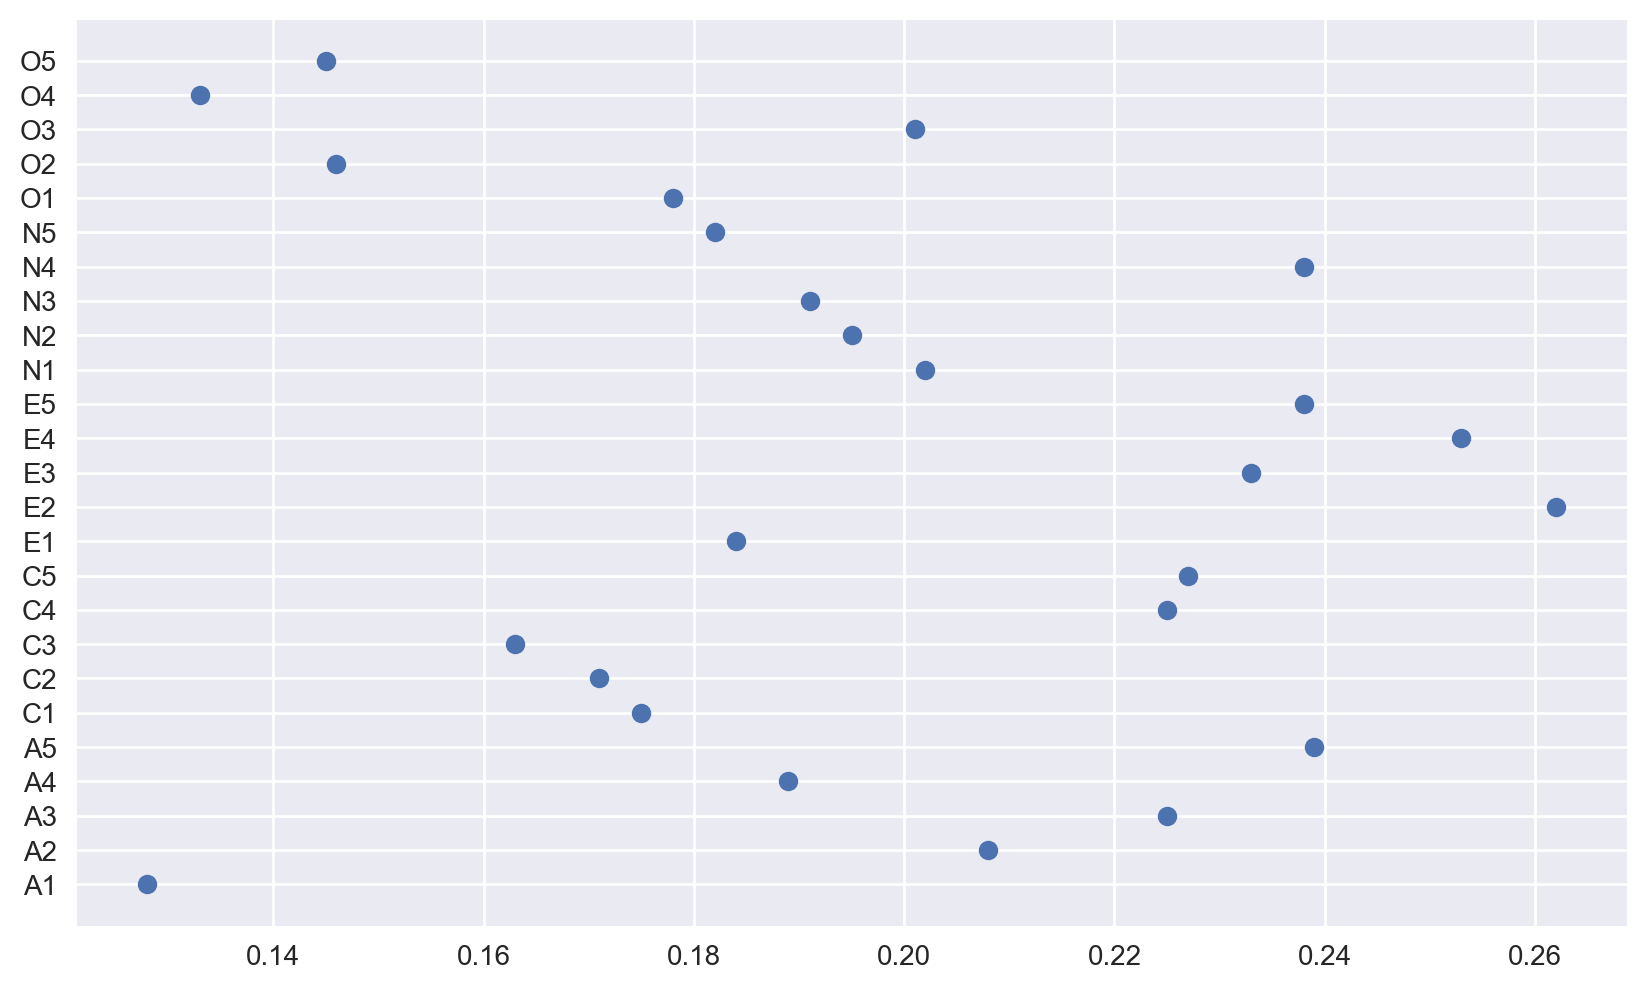

In [18]:
mean_values = personality_corrs_abs.apply(lambda x: round(x.mean(),3))
plt.plot(mean_values.values, mean_values.index, 'o')

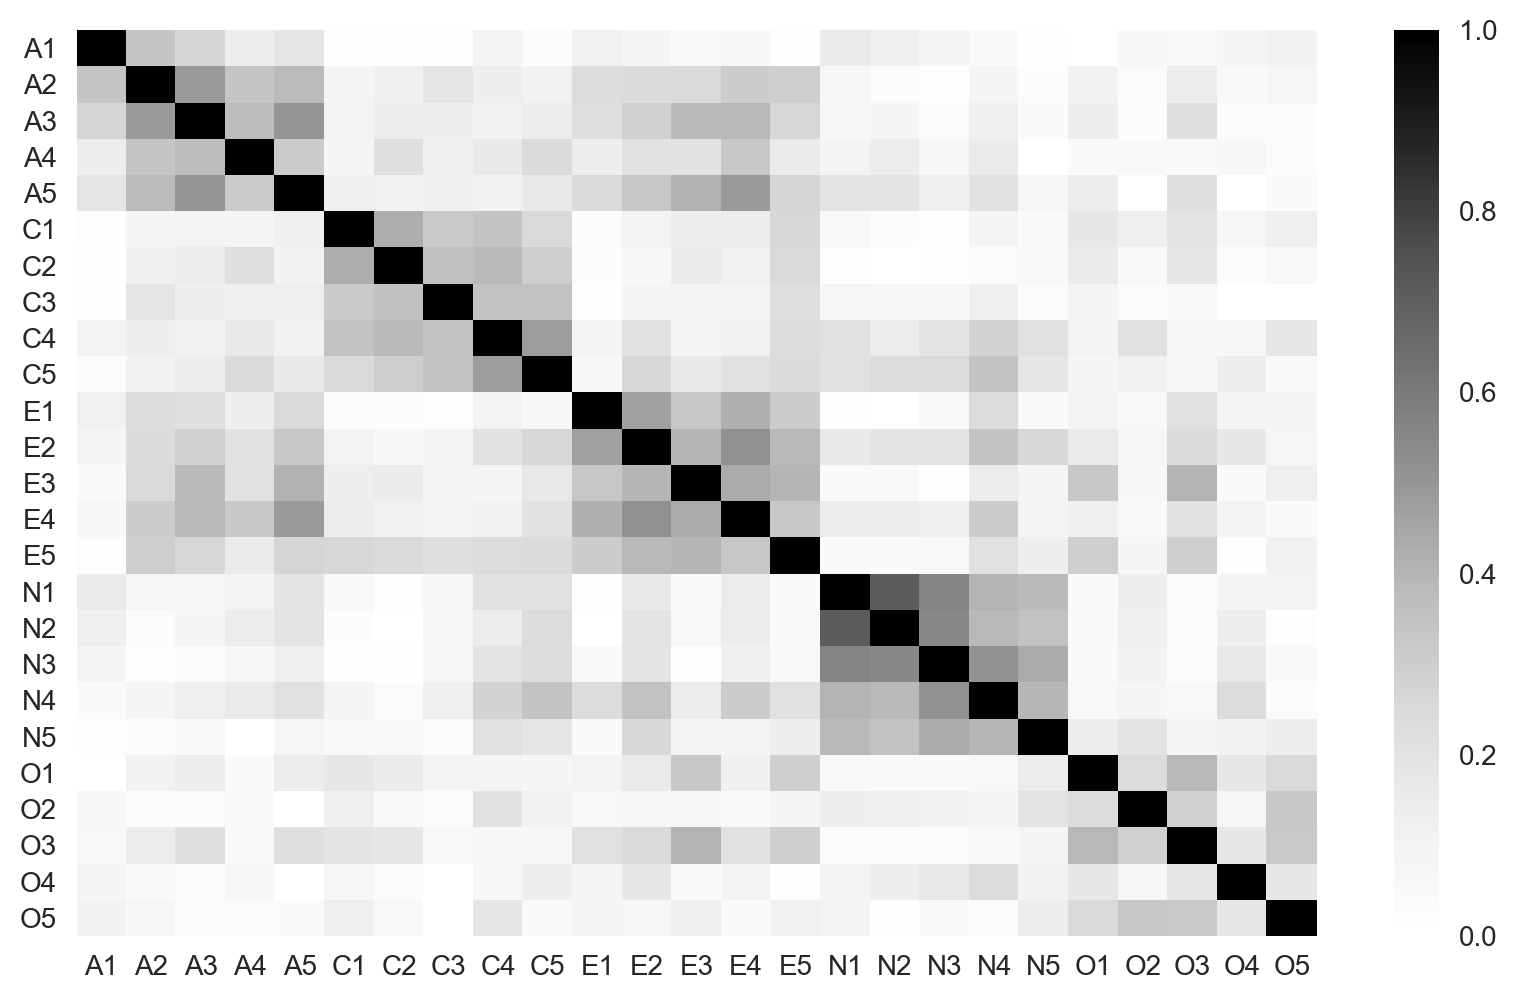

In [19]:
sns.heatmap(personality_corrs_abs, cmap='Greys', vmin=0.0, square=False)

## Ejercicio 4: Extracción de factores

* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot. 
* Extraiga las cargas $\lambda$ del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [20]:
fact.calculate_bartlett_sphericity(personality_df)

(16484.781654160415, 0.0)

In [21]:
fact.calculate_kmo(personality_df)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

In [22]:
personality_factor = fact.FactorAnalyzer()
personality_factor.analyze(personality_df, 6, method=None)

Text(0,0.5,'Eigenvalues')

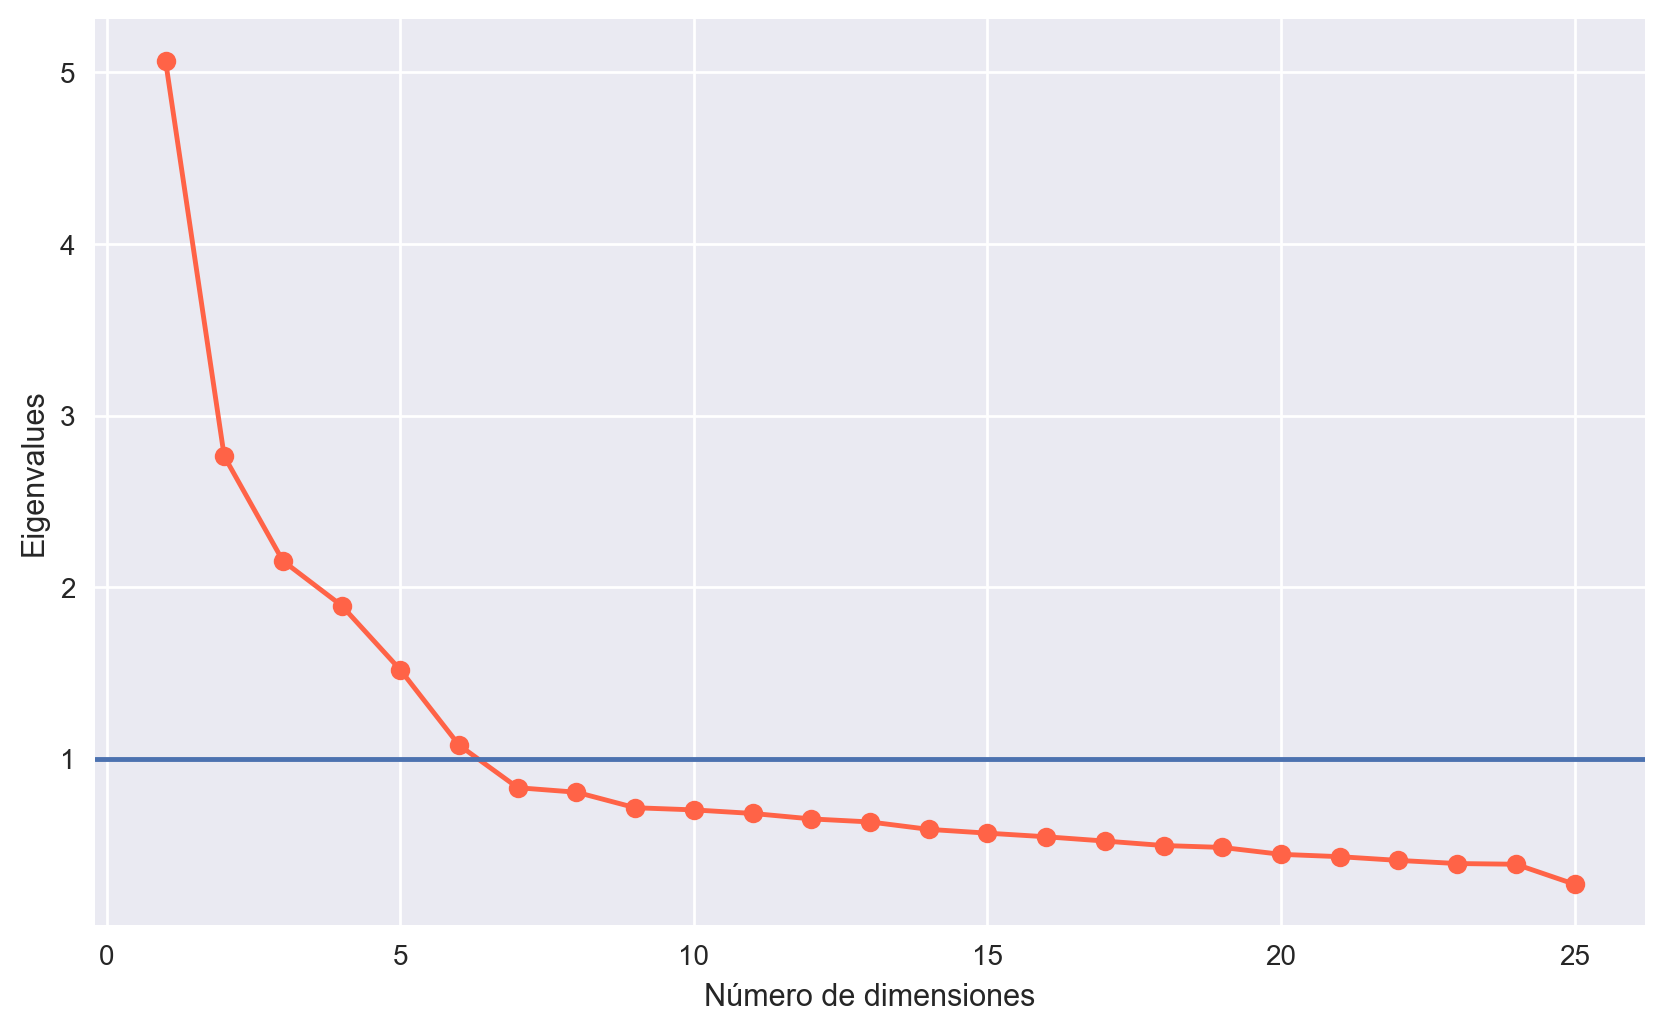

In [23]:
personality_eigenvalues = personality_factor.get_eigenvalues()[0]
plt.plot(personality_eigenvalues.index + 1, personality_eigenvalues.values, 'o-', color='tomato')
plt.axhline(1)
plt.xlabel("Número de dimensiones")
plt.ylabel("Eigenvalues")

In [24]:
personality_loadings = personality_factor.loadings
personality_loadings = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2)))
personality_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,,,,,0.64,
A3,,,,,0.49,
A4,,,,,,
A5,,,,,,
C1,,,0.59,,,
C2,,,0.74,,,
C3,,,0.61,,,
C4,,,,,,0.48
C5,,,,,,


## Ejercicio 5: Modelación de factores

* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con `kdplot`.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$$
\tilde{y} = \beta_{0} + \beta_{1}\cdot\texttt{gender} + \beta_{2}\cdot\texttt{education} + \beta_{1}\cdot\texttt{age} + \varepsilon_{i}
$$

In [25]:
personality_scores = personality_factor.get_scores(personality_df)

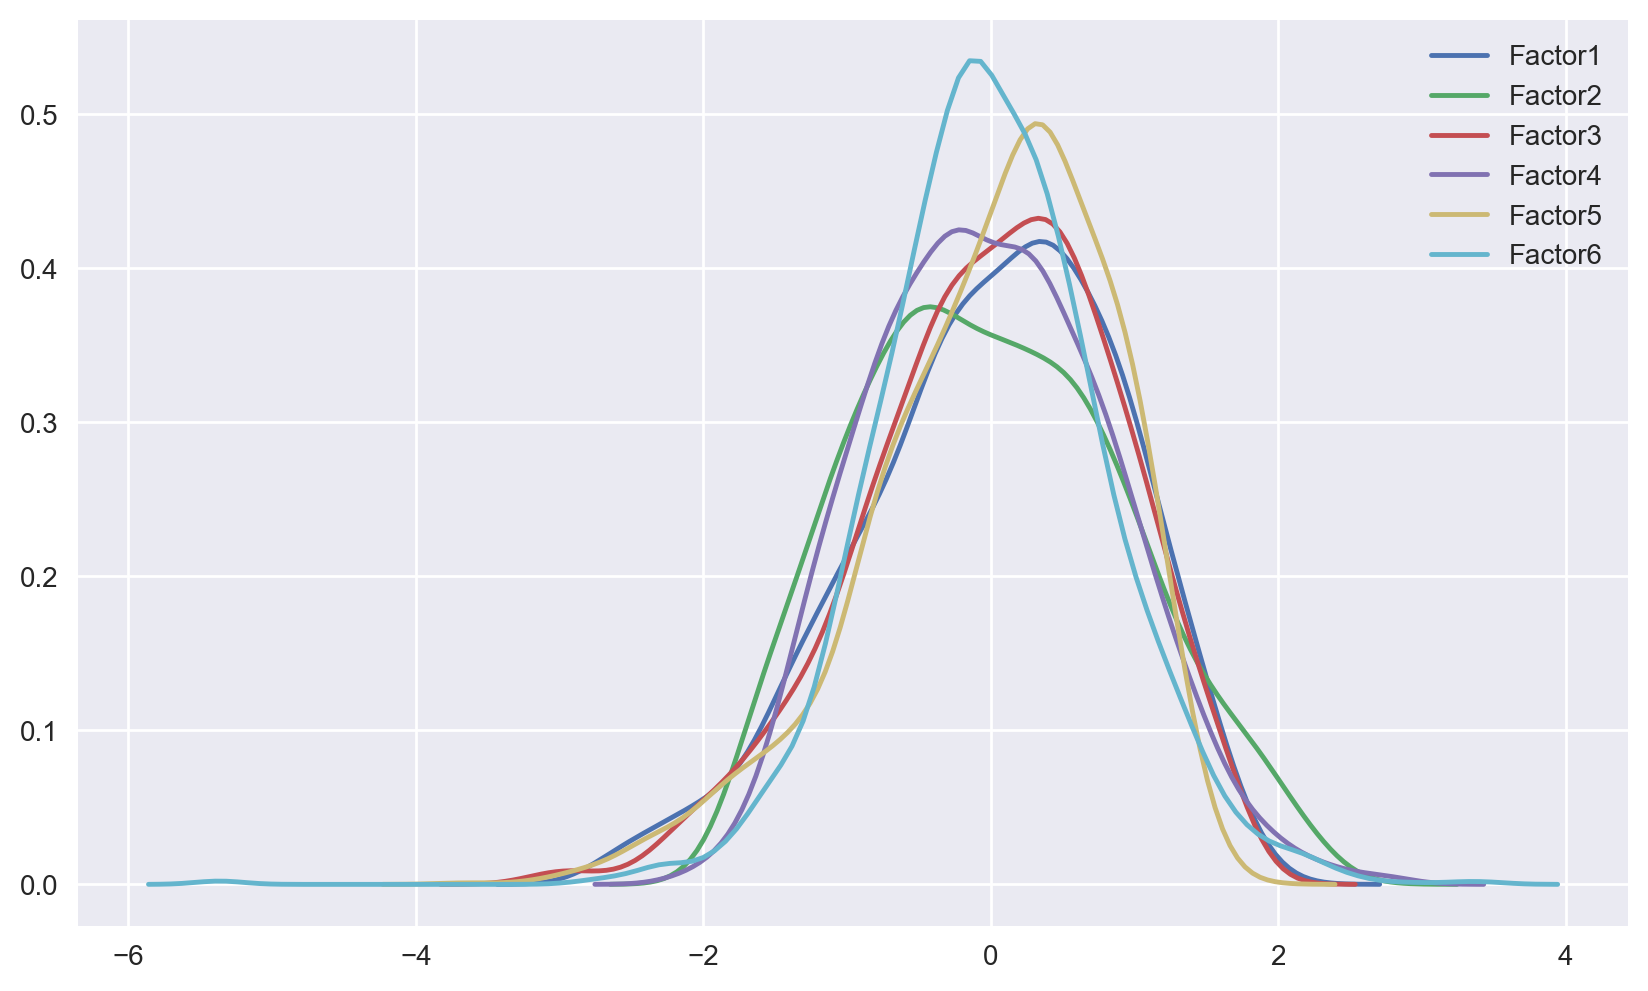

In [26]:
sns.kdeplot(personality_scores.Factor1.dropna())
sns.kdeplot(personality_scores.Factor2.dropna())
sns.kdeplot(personality_scores.Factor3.dropna())
sns.kdeplot(personality_scores.Factor4.dropna())
sns.kdeplot(personality_scores.Factor5.dropna())
sns.kdeplot(personality_scores.Factor6.dropna())

In [27]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


In [28]:
for colnames, serie in personality_scores.iteritems():
    df[str(colnames)] = serie

In [29]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,2,3.0,21,0.315466,0.993684,0.042760,-0.702200,0.906063,1.080357
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1,2.0,19,1.648556,-1.045418,0.235199,-0.381786,0.609304,-0.380531
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,1,1.0,21,0.989694,0.614414,-0.324259,-0.291591,-0.131244,1.066071
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1,1.0,17,-1.684468,-0.388122,0.160753,0.172218,0.570324,-0.048471
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,1,5.0,68,-0.827185,0.848514,-1.044274,0.391165,-1.162586,-0.213656


In [30]:
df['gender'] = df['gender'].replace([1, 2], [1, 0])

In [31]:
for i in df.loc[:, 'Factor1':'Factor6']:
    print(i)
    print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0317      0.083      0.384      0.701      -0.130       0.194
gender        -0.0158      0.047     -0.339      0.735      -0.107       0.075
education     -0.0067      0.020     -0.331      0.740      -0.046       0.033
age            0.0004      0.002      0.213      0.832      -0.004       0.005
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0076      0.085      0.089      0.929      -0.159       0.174
gender        -0.0134      0.048     -0.282      0.778      -0.107       0.080
education     -0.0188      0.021     -0.907      0.364      -0.060       0.022
age            0.0016      0.002      0.747      0.455      -0.003       0.006
Factor3
                 coef    std

<img src="logo.png",width=200,height=200>

# Actividad 14 - Dimensionalidad y Agrupación

* Para poder realizar esta actividad debes haber revisado la lectura correspondiente a la semana.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminada la actividad, comprime la carpeta y sube el `.zip` a la sección correspondiente.


## Ejercicio 1: Preparación del ambiente de trabajo

* Para este ejercicio trabajaremos de manera __conjunta__ en dos bases de datos que se encuentra en `sklearn.datasets`:
    * `breast_cancer`: Base de datos de diagnóstico de cáncer de mamas.
    * `iris`: Base de datos sobre atributos morfológicos de flores _Iris_.

* Importe los módulos básicos para el análisis de datos.
* Importe los módulos `KMeans`, `PCA`, `train_test_split` y `StandardScaler`.


## Ejercicio 2: Agrupando atributos con KMeans

* Importe la base de datos `iris` con `load_iris` en un nuevo objeto:
    - _tip_: La matriz de atributos se encuentra en `.data`.
* Para simplificar la dimensionalidad de la beduzca las dimensiones de la base de datos para obtener dos componentes principales.
* Comente cuánta es la varianza explicada por ambos componentes.
* Grafique ambas dimensiones con un scatter plot.
* Exploremos la cantidad de clusters necesarios. Para ello estimen la inercia con $k$ entre 2 y 50. También calculen el diferencial (_tip_: puede utilizar el método `.diff()` de `pd.Series`). Grafiquen ambas curvas.
* Utilicen como criterio de selección aquél cluster cuya disminución en la inercia sea mayor a 15
* Reentrenen el modelo con todos los datos en base al 
* Grafique los resultados e identifique todos los puntos con `kmeans.labels_`

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
df = load_iris()
pca = PCA(n_components=2).fit(df.data)
pca_reduced = pca.transform(df.data)

In [33]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.92461621,  0.97763178])

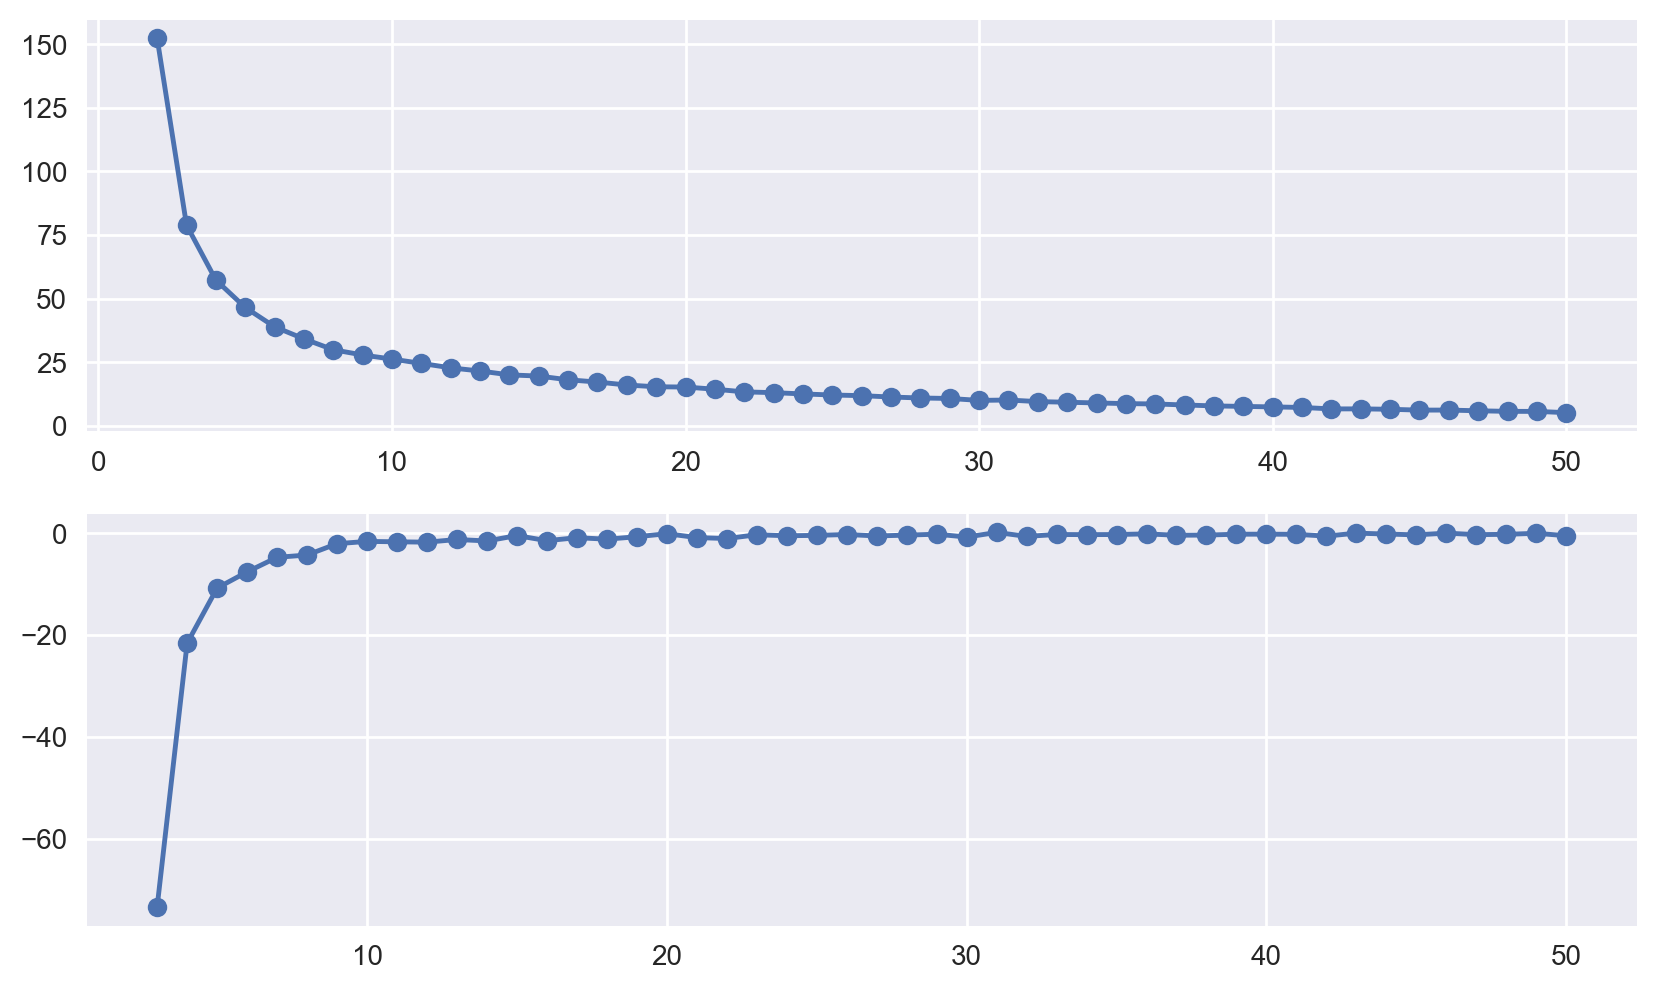

In [34]:
store_inertia = []
store_k_number = []

for i in range(2, 51):
    tmp = KMeans(n_clusters = i, random_state=11238)
    tmp.fit(df.data)
    store_k_number.append(i)
    store_inertia.append(tmp.inertia_)

inertial = pd.DataFrame({'inertia': store_inertia, 'k': store_k_number})
inertial['inertial_diff'] = inertial['inertia'].diff()
plt.subplot(2, 1, 1)
plt.plot(inertial['k'], inertial['inertia'], 'o-')
plt.subplot(2, 1, 2)
plt.plot(inertial['k'], inertial['inertial_diff'], 'o-', color='tomato')

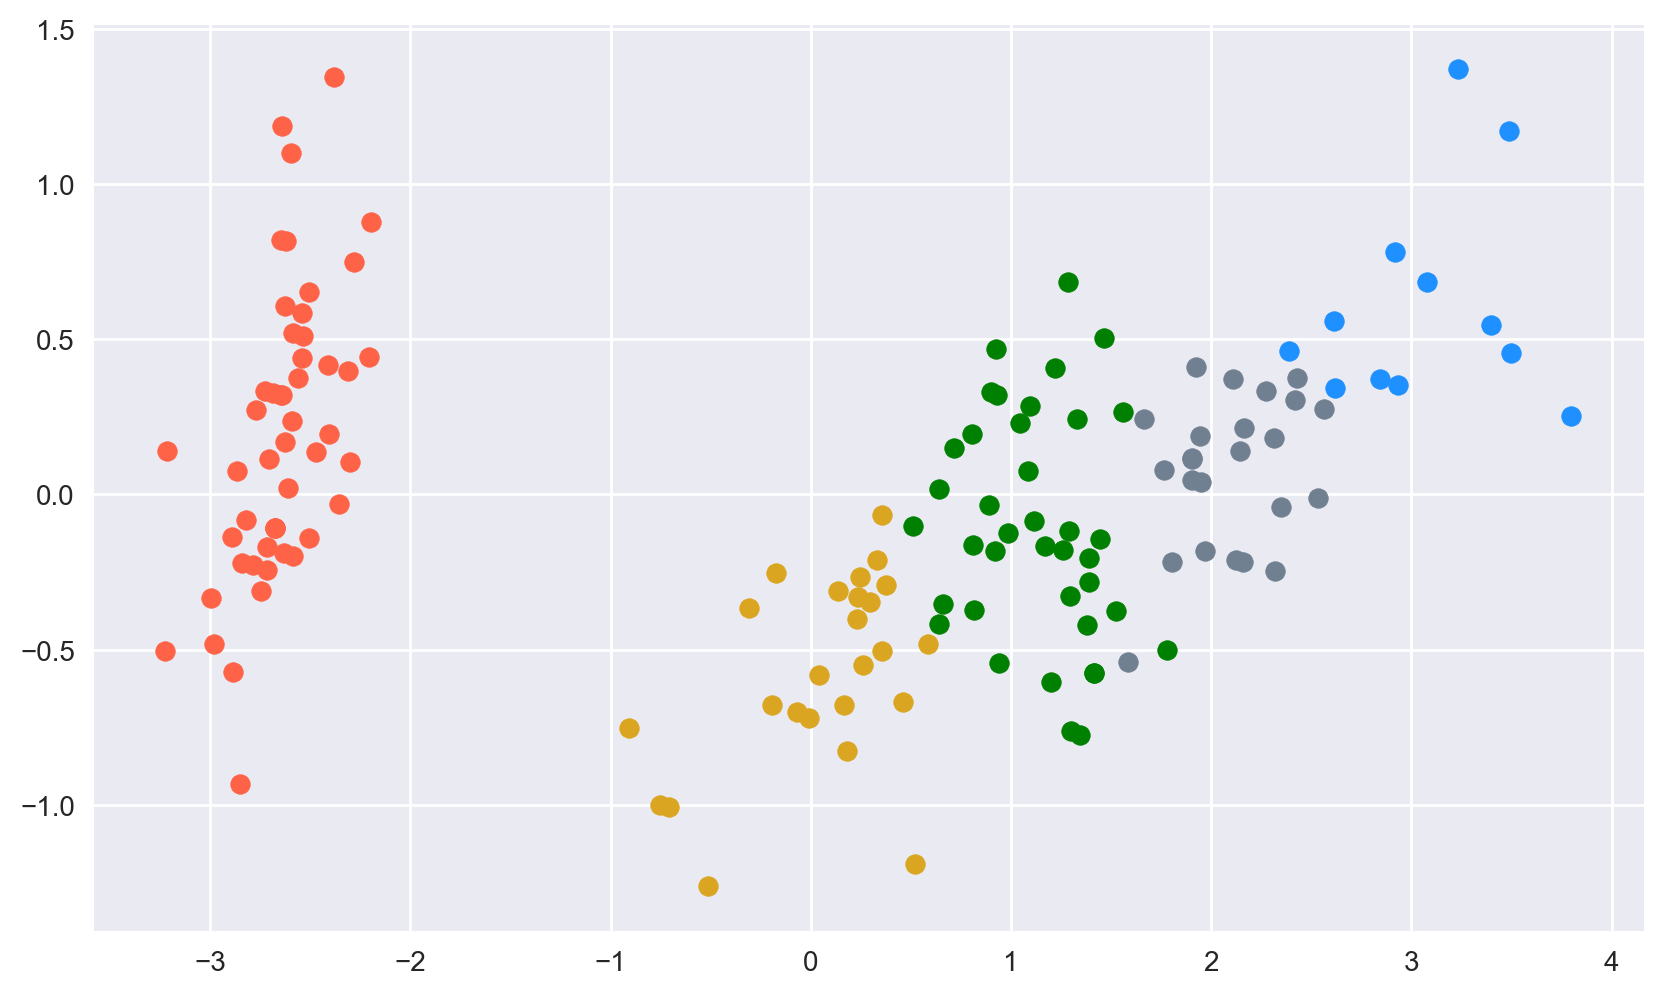

In [36]:
kmeans = KMeans(n_clusters=5, random_state=11238)
kmeans.fit(df.data)


for i in range(0, pca_reduced.shape[0]):
    if kmeans.labels_[i] == 1:
        plt.scatter(pca_reduced[i, 0], pca_reduced[i, 1], c='tomato')
    elif kmeans.labels_[i] == 0:
        plt.scatter(pca_reduced[i, 0], pca_reduced[i, 1], c='slategrey')
    elif kmeans.labels_[i] == 2:
        plt.scatter(pca_reduced[i, 0], pca_reduced[i, 1], c='goldenrod')
    elif kmeans.labels_[i] == 4:
        plt.scatter(pca_reduced[i, 0], pca_reduced[i, 1], c='green')
    elif kmeans.labels_[i] == 3:
        plt.scatter(pca_reduced[i, 0], pca_reduced[i, 1], c='dodgerblue')

## Ejercicio 2: Reduciendo dimensiones

* Importe la base de datos `breast_cancer` con `load_breast_cancer` en un nuevo objeto:
    - _tip_: La matriz de atributos se encuentra en `.data`.
* Separe los datos en dos objetos: `benigno` y `maligno`. Utilice la información disponible en `.target` para ello.
* Ahora compararemos la distribución empírica para cada atributo en la base mediante histogramas.
* Reduzca la matriz de atributos a dos.
* Reporte el nivel de de varianza explicada por ambas dimensiones.
* Reporte la asociación entre cada atributo y los componentes extraídos.
* Visualice la relación entre ambos componentes y etiquete los puntos en base a su atributo `target`.

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = load_breast_cancer()

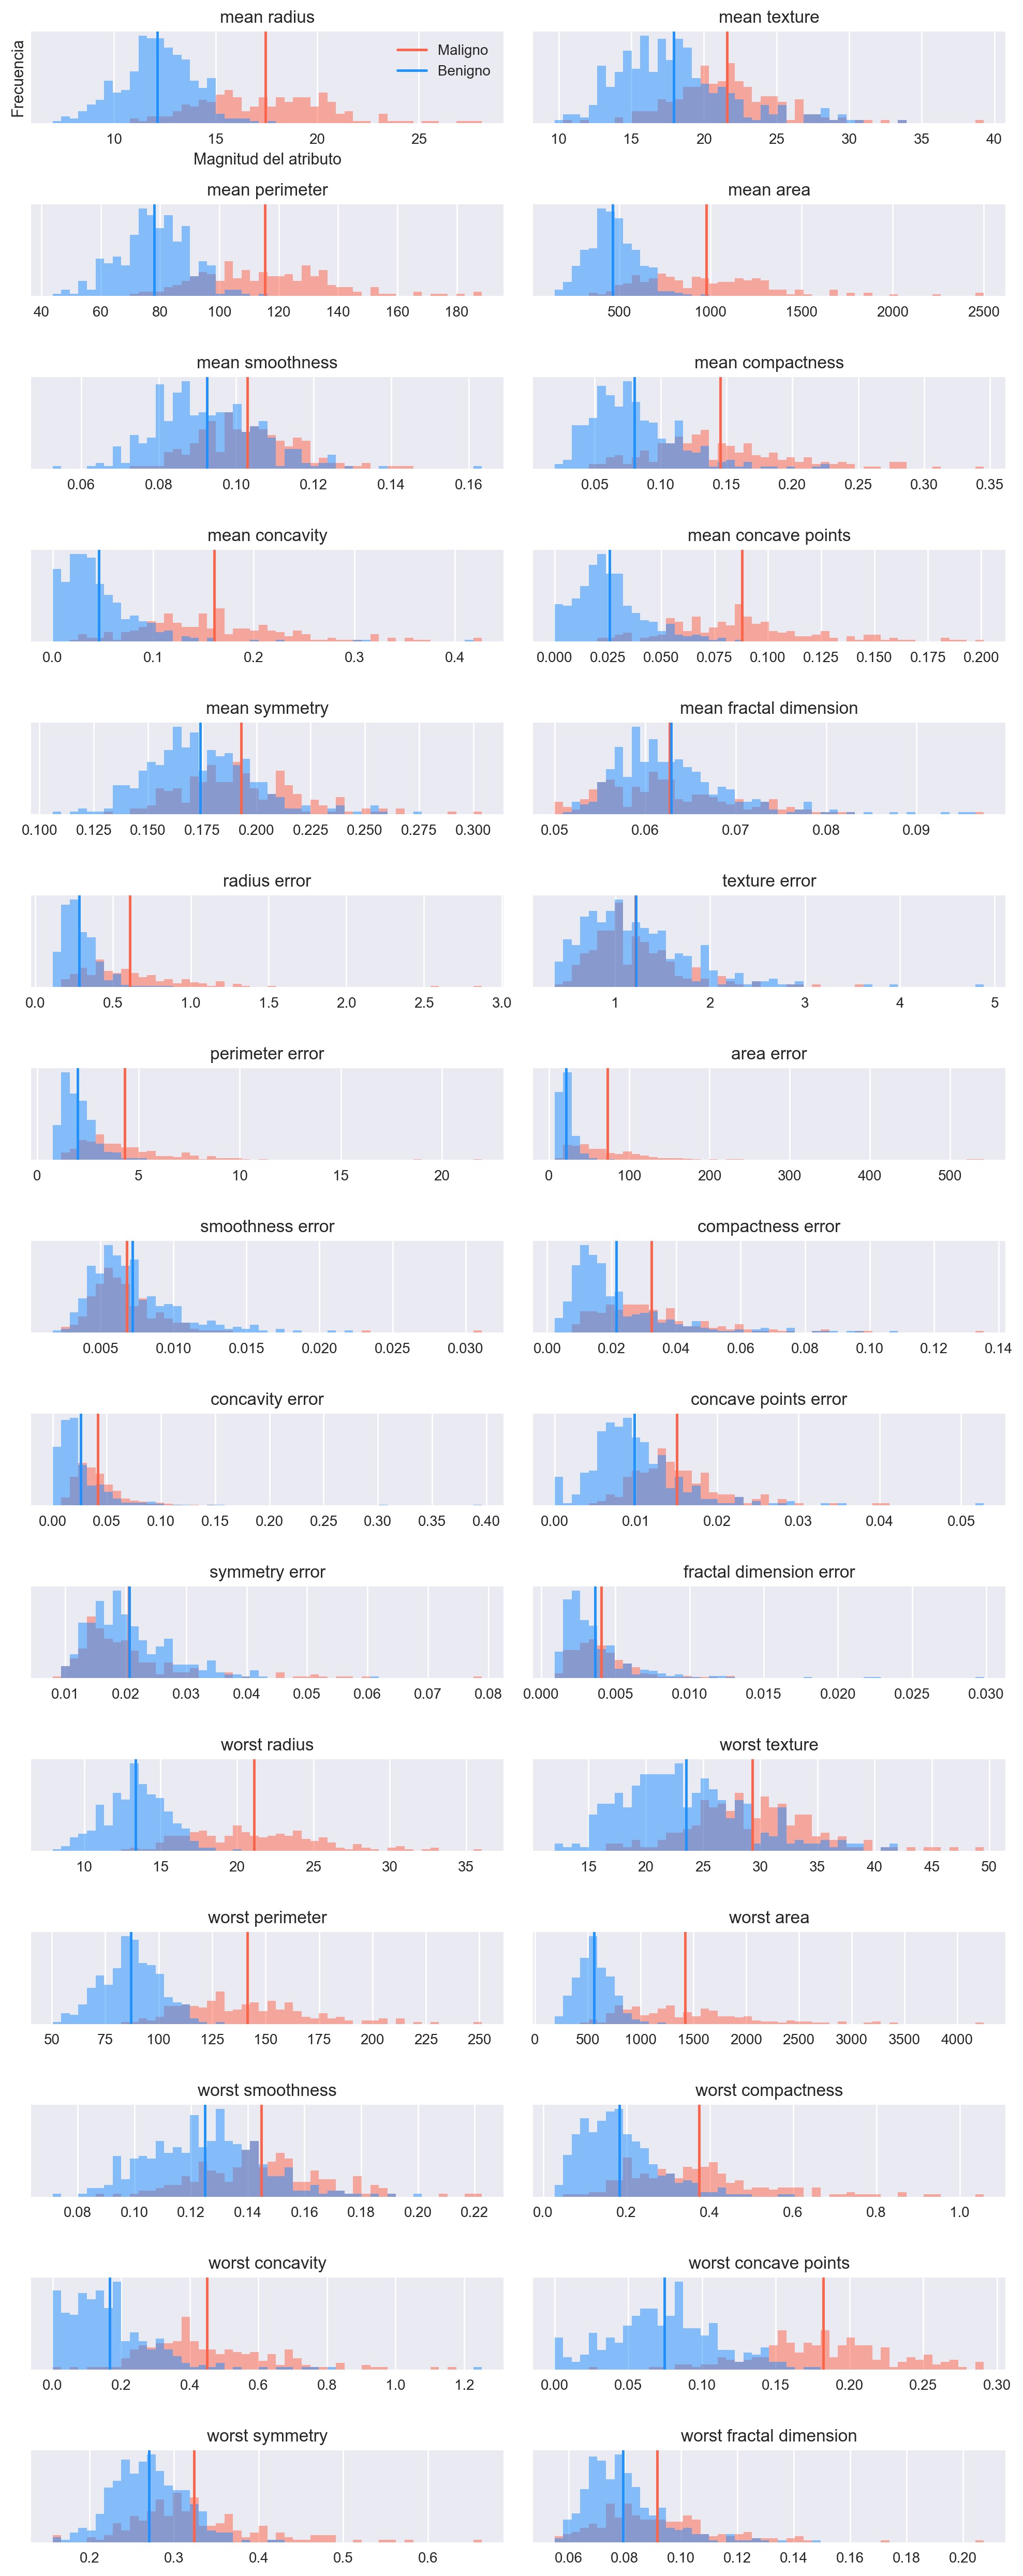

In [38]:
figure, axes = plt.subplots(15, 2, figsize=(10, 25))
benign = df.data[df.target == 1]
malignant = df.data[df.target == 0]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(df.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5, color="tomato")
    ax[i].axvline(np.mean(malignant[:, i]), color="tomato")
    ax[i].hist(benign[:, i], bins=bins, alpha=.5, color="dodgerblue")
    ax[i].axvline(np.mean(benign[:, i]), color="dodgerblue")
    ax[i].set_title(df.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Magnitud del atributo")
ax[0].set_ylabel("Frecuencia")
ax[0].legend(["Maligno", "Benigno"], loc="best")
figure.tight_layout()

In [39]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df.data)
X_scaled = scaler.transform(df.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(569, 30)
(569, 2)
[ 0.44272026  0.18971182]


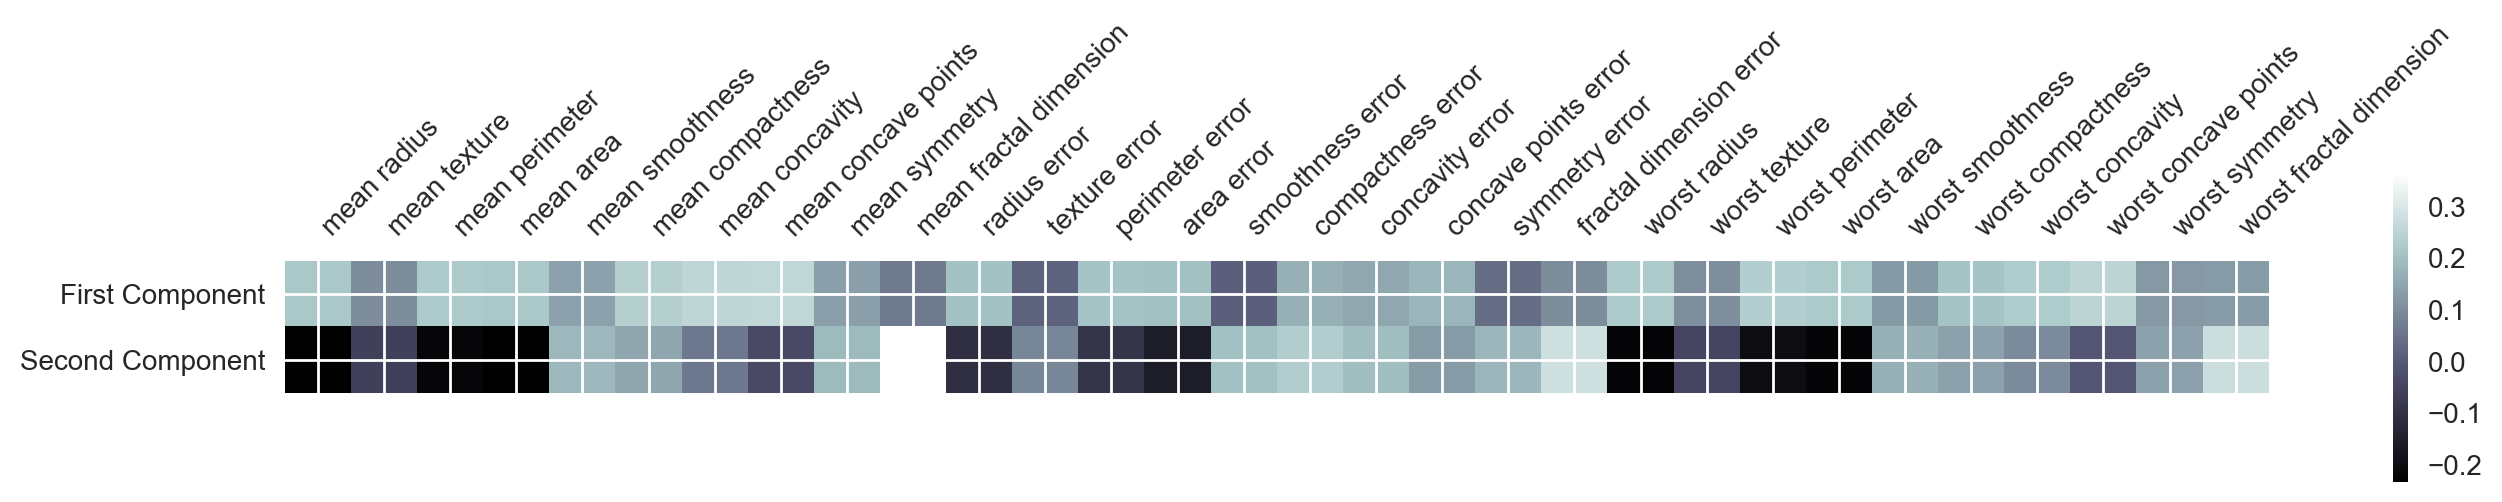

In [41]:
plt.matshow(pca.components_, cmap="bone")
plt.yticks([0, 1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(df.feature_names)), df.feature_names, rotation=45, ha='left');

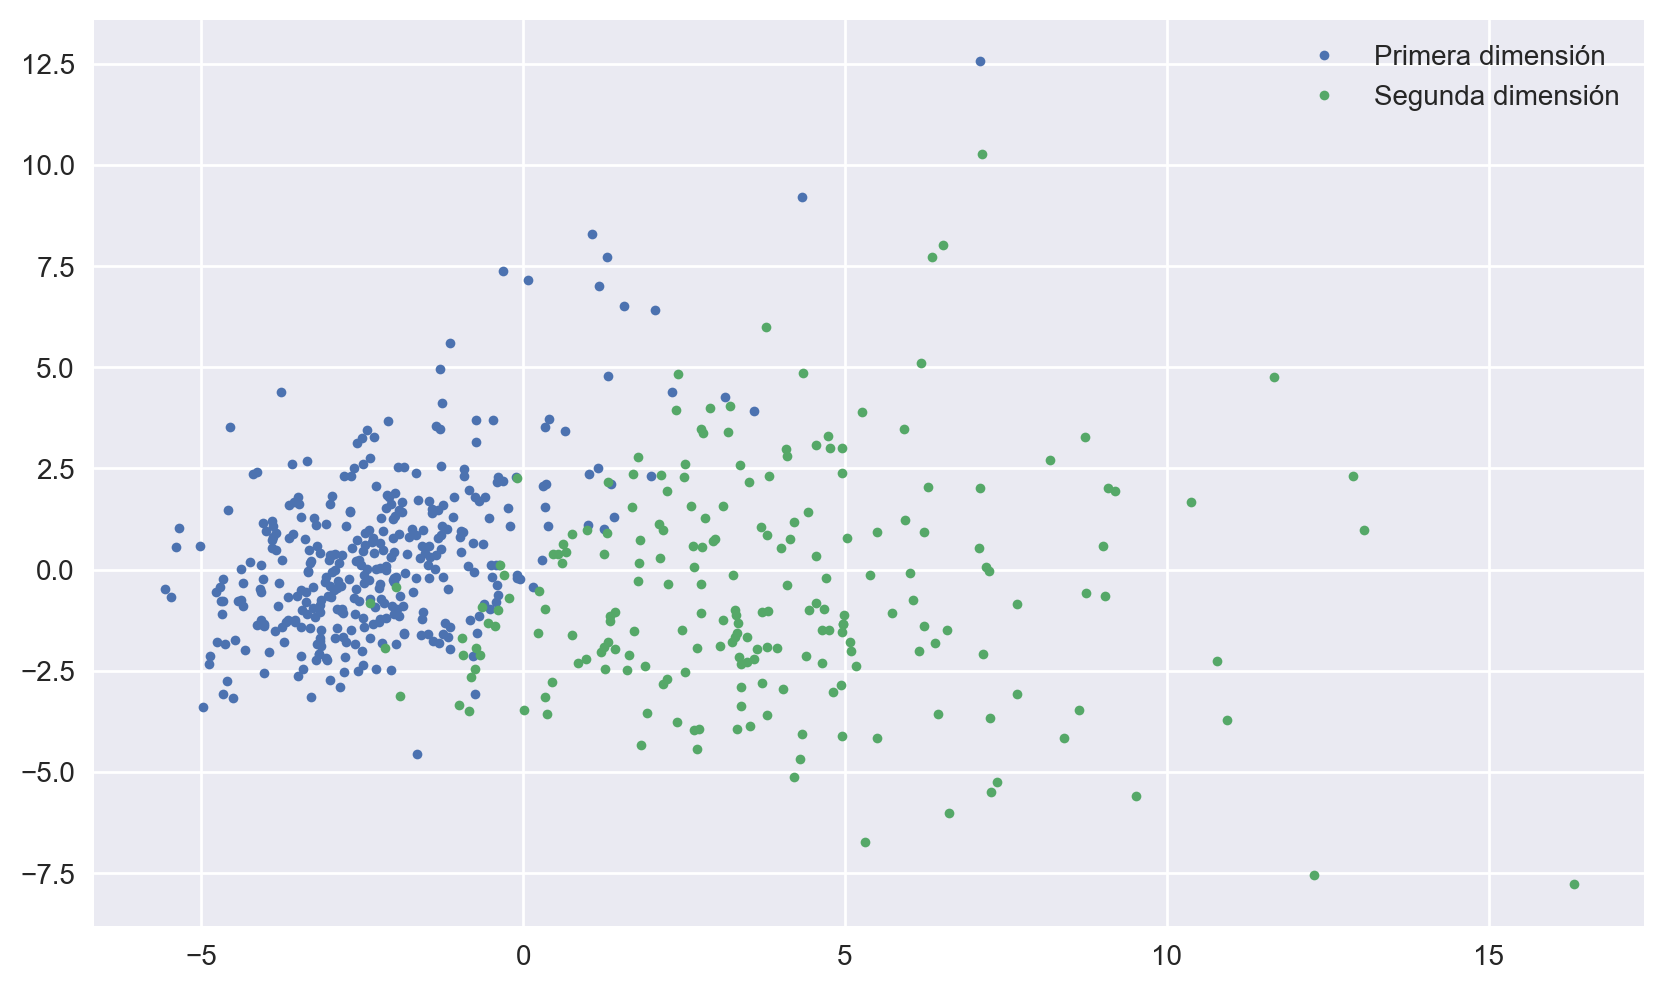

In [42]:
plt.plot(X_pca[df.target == 1][:,0], X_pca[df.target == 1][:, 1], '.', label="Primera dimensión")
plt.plot(X_pca[df.target == 0][:,0], X_pca[df.target == 0][:, 1], '.', label="Segunda dimensión")
plt.legend(loc="best")